<a href="https://colab.research.google.com/github/Daniel-Karlik/Parliament_Spotlight_NLP/blob/dev_model/Solving_hierarchic_K_means%2C_TF_IDF_Parliament_Spotlight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import glob
import re
import string

In [84]:
#from google.colab import auth
from google.colab import drive
#auth.authenticate_user()

In [85]:
drive.mount('/content/drive/')
# Path to our data on google drive
DATA_PATH = "/content/drive/MyDrive/NLP/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Now we can use TF-IDF

In [86]:
psp_data = pickle.load(open('/content/drive/MyDrive/NLP/Changed/psp_data_300_no_stopwords.pickle', 'rb'))

In [87]:
test_data = psp_data.sample(frac=0.2)

In [88]:
test_data.head()

,Id,obdobi,datum,schuze,celeJmeno,OsobaId,funkce,tema,text,pocetSlov,politiciZminky
3869,2017_91_00052,2017,2021-03-23T00:00:00+01:00,91,Jana Maláčová,jana-malacova,Ministryně práce a sociálních věcí ČR,Zahájení schůze,obecně ráda návrh dětské skupiny resp jesle bu...,562,"[olga-richterova, jan-cizinsky]"
2725,2017_111_01238,2017,2021-07-14T00:00:00+02:00,111,Radek Holomčík,None,Poslanec,547. Ústní interpelace,slovo pane předsedající vážené dámy vážení pán...,1185,"[marian-jurecka, petr-pavek-8, jaroslav-jureck..."
42677,1998_43_01577,1998,2001-12-07T00:00:00+01:00,43,ČR Stanislav Gross,stanislav-gross,Ministr vnitra,143 - Návrh na usnesení Poslanecké sněmovny k&...,pane předsedo kolegové středočeského kraje pos...,549,[]
18525,2013_27_02217,2013,2015-05-27T00:00:00+02:00,27,Martin Kolovratník,martin-kolovratnik,Poslanec,142. Návrh na volbu členů Rady České televize,kolegyně kolegové dobré odpoledne teď volební ...,1037,"[vitezslav-jandak, vaclav-havel, zbynek-stanju..."
29511,2006_53_00034,2006,2009-03-24T00:00:00+01:00,53,Miroslav Grebeníček,miroslav-grebenicek,Poslanec,Zahájení schůze,vážený pane předsedo dámy pánové české společn...,1067,"[vaclav-havel, jiri-dienstbier, jiri-dienstbie..."


In [89]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9790 entries, 3869 to 40696
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              9790 non-null   object
 1   obdobi          9790 non-null   int64 
 2   datum           9790 non-null   object
 3   schuze          9790 non-null   int64 
 4   celeJmeno       9790 non-null   object
 5   OsobaId         9519 non-null   object
 6   funkce          9790 non-null   object
 7   tema            9790 non-null   object
 8   text            9790 non-null   object
 9   pocetSlov       9790 non-null   int64 
 10  politiciZminky  9496 non-null   object
dtypes: int64(3), object(8)
memory usage: 917.8+ KB


Test sample has 20% of our data, i.e. 9790.

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
tfidf_vectorizer = TfidfVectorizer(input='content', max_features = 500, max_df = 0.7, ngram_range=(1, 2)) # Hopefully stop_words will be filtered by TD-IDF mechanism
# ngram_range=(1, 1) only unigram, ngram_range=(1, 2) uni and bigrams

In [92]:
tfidf_vector = tfidf_vectorizer.fit_transform(test_data['text']) # Run time 146s

In [93]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names_out()) # HERE IT CRASHES with too high max_features 

In [94]:
#tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()

### First glance at our featured words

In [95]:
print(tfidf_df)

           bod      bodu  body    bychom  bychom měli  bydlení  byť  celou  \
0     0.000000  0.000000   0.0  0.000000          0.0      0.0  0.0    0.0   
1     0.000000  0.000000   0.0  0.044930          0.0      0.0  0.0    0.0   
2     0.000000  0.000000   0.0  0.000000          0.0      0.0  0.0    0.0   
3     0.000000  0.000000   0.0  0.045246          0.0      0.0  0.0    0.0   
4     0.000000  0.000000   0.0  0.000000          0.0      0.0  0.0    0.0   
...        ...       ...   ...       ...          ...      ...  ...    ...   
9785  0.000000  0.000000   0.0  0.000000          0.0      0.0  0.0    0.0   
9786  0.000000  0.000000   0.0  0.061523          0.0      0.0  0.0    0.0   
9787  0.000000  0.000000   0.0  0.000000          0.0      0.0  0.0    0.0   
9788  0.295838  0.065528   0.0  0.000000          0.0      0.0  0.0    0.0   
9789  0.000000  0.000000   0.0  0.000000          0.0      0.0  0.0    0.0   

          celá      celé  ...      říct     říkal      říká  ří

### Now we remove this auxiliary row

In [96]:
#tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')

In [97]:
tfidf_df.stack().reset_index()

,level_0,level_1,0
0,0,bod,0.0
1,0,bodu,0.0
2,0,body,0.0
3,0,bychom,0.0
4,0,bychom měli,0.0
...,...,...,...
4894995,9789,škol,0.0
4894996,9789,školství,0.0
4894997,9789,školy,0.0
4894998,9789,životního,0.0


### We rename columns to be more understandables

In [98]:
tfidf_df = tfidf_df.stack().reset_index() # This is necessary for some reason

In [99]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document_id','level_1': 'term'})

In [100]:
tfidf_df.sort_values(by=['document_id','tfidf'], ascending=[True,False]).groupby(['document_id']).head(3)

,document_id,term,tfidf
43,0,děti,0.424425
89,0,korun,0.302437
96,0,let,0.277465
511,1,chtěl,0.262171
916,1,věc,0.242015
...,...,...,...
4894195,9788,odst,0.328431
4894265,9788,práce,0.308334
4894965,9789,území,0.487918
4894645,9789,našich,0.452534


We can see above top 3 keywords for each document

## Results above seems promising

## Hierarchic k-means

In [101]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_vector)

clusters = km.labels_.tolist()

In [102]:
test_data['cluster'] = clusters

In [103]:
test_data['cluster'].value_counts()

3    4239
1    2528
0    1380
4    1120
2     523
Name: cluster, dtype: int64

In [104]:
#help_data = test_data[test_data['cluster'] == 0]['text']

Not working stuff below

In [105]:
# def hier_kmeans(data, max_level, num_clusters, max_cluster, top_keywords):
#   km = KMeans(n_clusters = num_clusters)
#   km.fit(tfidf_vector)
#   clusters = km.labels_.tolist()
#   data['cluster'] = clusters
#   #data.head()
#   id_cl_prev = data[['Id', 'cluster']]
#   for i in range(num_clusters):
#     #i = 0
#     if len(data[data['cluster'] == i]) > max_cluster:
#       help_data = data[data['cluster'] == i]
#       tfidf_vector_cluster = tfidf_vectorizer.fit_transform(help_data['text'])
#       km.fit(tfidf_vector_cluster)
#       help_clusters = km.labels_.tolist()
#       help_data['cluster2'] = help_clusters
#       #data[data['cluster'] == i]['cluster'] = data[data['cluster'] == i]['cluster'].apply(lambda x: "{}{}".format(x, help_clusters))
    
#     if i == 0:
#       id_cl_df = help_data[['Id', 'cluster2']].copy()
#       print("i is: "); print(i)
#       print(len(id_cl_df['cluster2']))
#     else:
#       id_cl_df = pd.concat([id_cl_df, help_data[['Id', 'cluster2']]], join="inner")
#       print("i is: "); print(i)
#       print(len(id_cl_df['cluster2']))
#   return id_cl_prev, id_cl_df


In [106]:
# id_cl, data = hier_kmeans(test_data, 4, 5, 50, 8)

In [107]:
#data.head()

In [108]:
#data.info()

In [109]:
tfidf_vectorizer.get_feature_names_out()

array(['bod', 'bodu', 'body', 'bychom', 'bychom měli', 'bydlení', 'byť',
       'celou', 'celá', 'celé', 'celý', 'chtěl', 'chvíli', 'cílem',
       'dalších', 'daní', 'daně', 'demokracie', 'diskuse', 'diskusi',
       'dne', 'dneska', 'dnů', 'dobré', 'dobu', 'doby', 'době', 'dobře',
       'dokonce', 'domnívám', 'dopravy', 'dovolte', 'dovolím', 'došlo',
       'druhá', 'druhé', 'druhého', 'druhý', 'dvou', 'dámy',
       'dámy pánové', 'díky', 'dělat', 'děti', 'dětí', 'důležité',
       'důvod', 'důvodu', 'důvody', 'důvodů', 'evropské', 'evropské unie',
       'financování', 'financí', 'finanční', 'firmy', 'fondu', 'hlasovat',
       'hlasování', 'hlasování pořadové', 'hlediska', 'hnutí', 'hodin',
       'informace', 'jaké', 'jakým', 'jasné', 'jasně', 'jednoho',
       'jednotlivých', 'jednoznačně', 'jednu', 'jedná', 'jednání',
       'jedné', 'jim', 'jiného', 'jiný', 'jiných', 'jistě', 'kdyby',
       'koalice', 'kolega', 'kolegové', 'kolegy', 'kolegyně',
       'kolegyně kolegové', 'k

## Pokus

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [111]:
tfidf_df.head()

,document_id,term,tfidf
0,0,bod,0.0
1,0,bodu,0.0
2,0,body,0.0
3,0,bychom,0.0
4,0,bychom měli,0.0


In [112]:
tfidf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895000 entries, 0 to 4894999
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   document_id  int64  
 1   term         object 
 2   tfidf        float64
dtypes: float64(1), int64(1), object(1)
memory usage: 112.0+ MB


Not good form of tfidf_df, so we transform it.

In [113]:
from scipy.cluster.hierarchy import fcluster, linkage

In [114]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names_out()) 

In [115]:
#tfidf_df.head()

In [116]:
distance_matrix = linkage(tfidf_df, method = 'ward', metric = 'euclidean')

In [117]:
print(distance_matrix)

[[2.88800000e+03 4.81800000e+03 1.10934250e-01 2.00000000e+00]
 [4.96000000e+03 5.21300000e+03 1.42026550e-01 2.00000000e+00]
 [2.74900000e+03 8.26200000e+03 1.89645963e-01 2.00000000e+00]
 ...
 [1.95540000e+04 1.95750000e+04 1.15808432e+01 9.11800000e+03]
 [1.95560000e+04 1.95650000e+04 1.21717388e+01 6.72000000e+02]
 [1.95760000e+04 1.95770000e+04 2.04377638e+01 9.79000000e+03]]


### This matrix


```
distance_matrix
```
### contains 4 values, distance_matrix[0] cluster1, distance_matrix[1] cluster2, which merges together.

### distance_matrix[2] is distance and distance_matrix[3] number of samples in cluster.  


In [118]:
print(np.shape(distance_matrix))

(9789, 4)


In [119]:
dist2 = linkage(tfidf_df, 'average', metric = 'cosine')

In [120]:
print(dist2)

[[2.88800000e+03 4.81800000e+03 6.15320386e-03 2.00000000e+00]
 [4.96000000e+03 5.21300000e+03 1.00857705e-02 2.00000000e+00]
 [2.74900000e+03 8.26200000e+03 1.79827957e-02 2.00000000e+00]
 ...
 [1.95550000e+04 1.95750000e+04 9.07633672e-01 1.10800000e+03]
 [1.86990000e+04 1.95740000e+04 9.17784156e-01 8.68200000e+03]
 [1.95760000e+04 1.95770000e+04 9.25371857e-01 9.79000000e+03]]


## How to use it...

In [121]:
num_clusters = 250
#link_mat = fcluster(distance_matrix, t = 100, criterion = 'maxclust', depth = 8)
link_mat = fcluster(distance_matrix, t = num_clusters, criterion = 'maxclust')

In [122]:
print(link_mat)

[224  65  21 ... 223 188 197]


In [123]:
print(np.shape(link_mat))

(9790,)


In [124]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

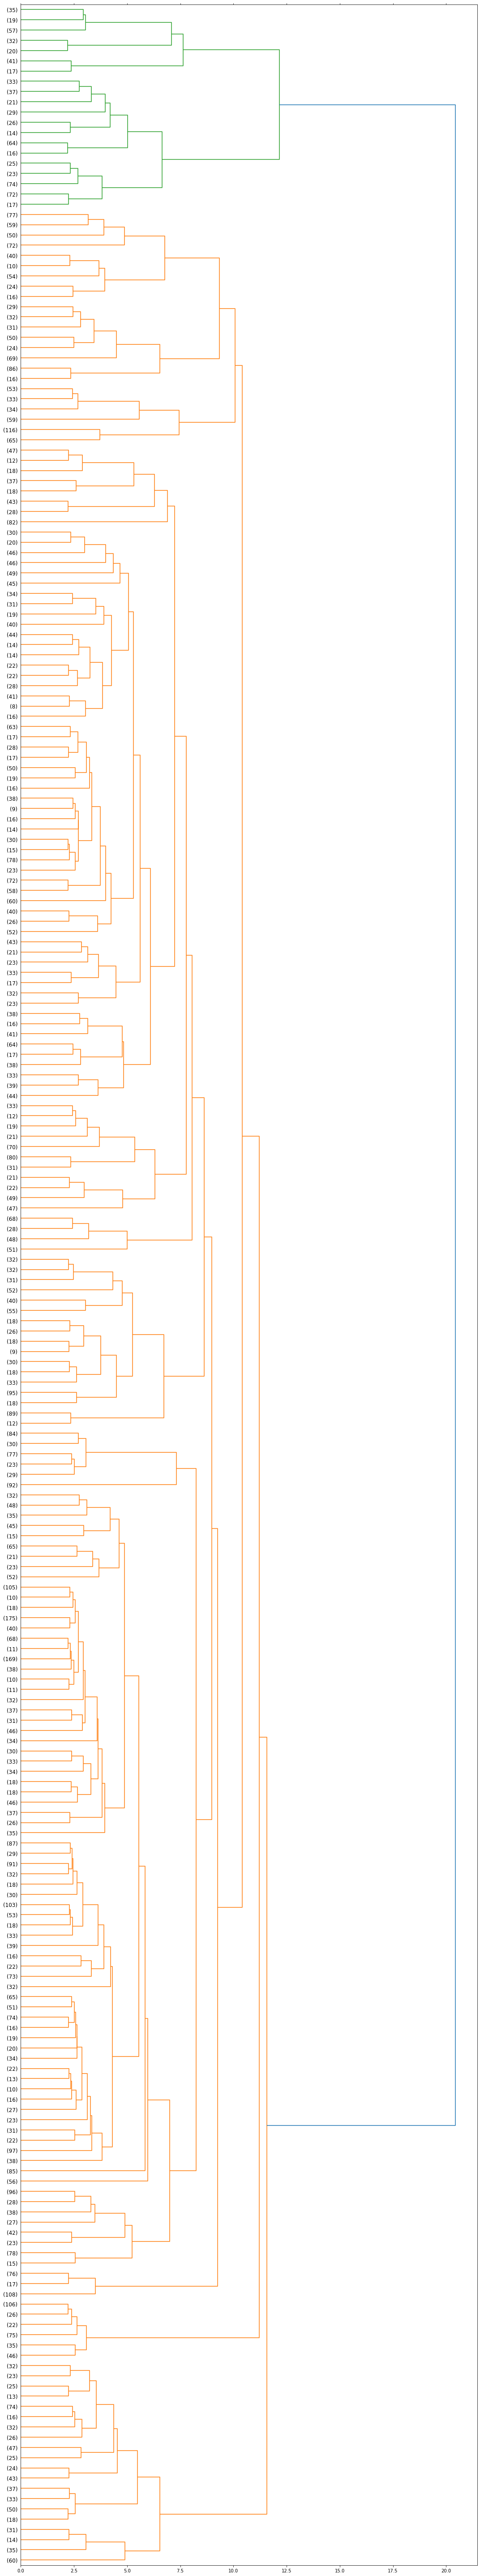

In [125]:
fig, ax = plt.subplots(figsize=(15, 80)) # set size
ax = dendrogram(distance_matrix, truncate_mode='lastp', p=250, leaf_font_size=12. ,orientation="right");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

In [126]:
import matplotlib.pyplot as plt

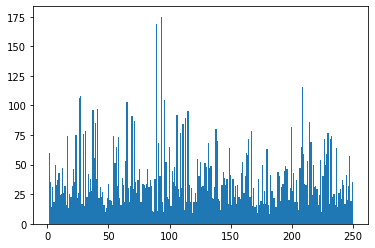

In [127]:
plt.hist(link_mat, bins=num_clusters)
plt.show()

## fcluster of 2 clusters and 3 clusters

In [128]:
link_mat3 = fcluster(distance_matrix, t = 3, criterion = 'maxclust')

In [129]:
print(link_mat3)

[1 1 1 ... 1 1 1]


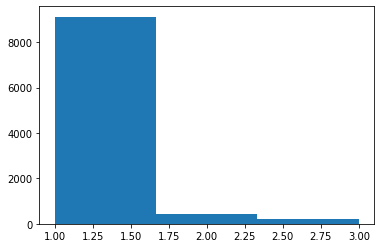

In [130]:
plt.hist(link_mat3, bins=3)
plt.show()

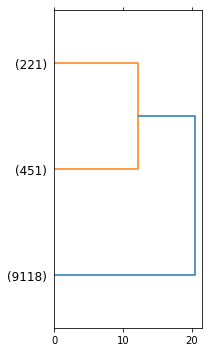

In [131]:
fig, ax = plt.subplots(figsize=(3, 5)) # set size
ax = dendrogram(distance_matrix, truncate_mode='lastp', p=3, leaf_font_size=12. ,orientation="right");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

In [132]:
link_mat2 = fcluster(distance_matrix, t = 2, criterion = 'maxclust')

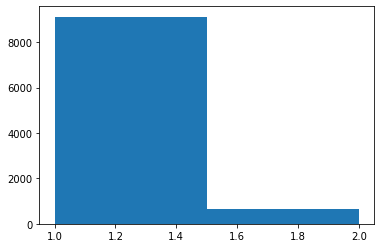

In [133]:
plt.hist(link_mat2, bins=2)
plt.show()

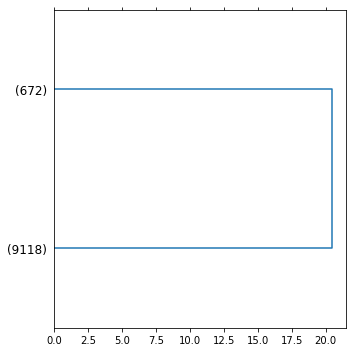

In [134]:
fig, ax = plt.subplots(figsize=(5, 5)) # set size
ax = dendrogram(distance_matrix, truncate_mode='lastp', p=2, leaf_font_size=12. ,orientation="right");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

## We would like to try find solution for 250 clusters using 


```
fcluster()
```



In [135]:
num_clusters = 250
#link_mat = fcluster(distance_matrix, t = 100, criterion = 'maxclust', depth = 8)
clusters_250 = fcluster(distance_matrix, t = num_clusters, criterion = 'maxclust')

In [136]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    #tfidf_vector.toarray() # hope this can be commented
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        print(" ".join([format(df.loc[i,x], "10.3f") for x in np.argsort(r)[-n_terms:]]))


get_top_keywords(tfidf_vector, clusters_250, tfidf_vectorizer.get_feature_names(), 5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Cluster 1
mld, rozpočtu, kč, korun, mil
     0.089      0.091      0.119      0.153      0.458

Cluster 2
mil, zvýšení, pojištění, daně, kč
     0.053      0.061      0.066      0.091      0.500

Cluster 3
rok, majetku, mld, fondu, kč
     0.112      0.182      0.321      0.406      0.447

Cluster 4
státního rozpočtu, státního, rozpočtu, mld, kč
     0.129      0.145      0.234      0.365      0.479

Cluster 5
usnesení, státního rozpočtu, státního, rozpočtu, rok
     0.127      0.132      0.189      0.190      0.251

Cluster 6
korun, státních, státního rozpočtu, státního, rozpočtu
     0.077      0.105      0.214      0.229      0.249

Cluster 7
rok, mld, státního, státního rozpočtu, rozpočtu
     0.136      0.167      0.320      0.329      0.435

Cluster 8
státního, státního rozpočtu, rozpočet, vláda, rozpočtu
     0.151      0.162      0.177      0.190      0.349

Cluster 9
rozpočtu, rok, roce, rozpočet, mld
     0.077      0.095      0.099      0.105      0.469

Cluster 10
mil, roc

### Be carefull those tfidf numbers are in opposite direction

In [137]:
df_250 = pd.DataFrame(tfidf_vector.todense()).groupby(clusters_250).mean()

In [138]:
print(df_250)

          0         1         2         3         4         5         6    \
1    0.001673  0.004672  0.000000  0.020013  0.002682  0.015686  0.004782   
2    0.018204  0.006078  0.000983  0.024559  0.002568  0.002862  0.013010   
3    0.000000  0.008399  0.000000  0.004530  0.000000  0.072050  0.000000   
4    0.000677  0.006802  0.001738  0.006124  0.005046  0.008863  0.004572   
5    0.011874  0.003748  0.000000  0.004467  0.006619  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
246  0.048252  0.000992  0.064521  0.025529  0.009675  0.000000  0.000000   
247  0.044337  0.012368  0.068883  0.022626  0.012765  0.000000  0.000000   
248  0.087661  0.029612  0.039886  0.024500  0.005482  0.000000  0.000675   
249  0.049912  0.053103  0.116133  0.036838  0.007873  0.000000  0.000000   
250  0.139226  0.068738  0.200038  0.042200  0.012324  0.000000  0.001896   

          7         8         9    ...       490       491       492  \
1  

In [139]:
df_250.loc[1,1]

0.004671910469932521

## For first 5 clusters

In [140]:
num_clusters = 5
#link_mat = fcluster(distance_matrix, t = 100, criterion = 'maxclust', depth = 8)
clusters_5 = fcluster(distance_matrix, t = num_clusters, criterion = 'maxclust')

In [141]:
get_top_keywords(tfidf_vector, clusters_5, tfidf_vectorizer.get_feature_names_out(), 10)


Cluster 1
vláda, rozpočet, miliard, rok, státního rozpočtu, kč, státního, mld, korun, rozpočtu
     0.067      0.076      0.080      0.082      0.088      0.092      0.094      0.121      0.135      0.154

Cluster 2
republika, česká, zemí, komise, české republiky, republiky, české, evropské unie, unie, evropské
     0.051      0.051      0.056      0.056      0.076      0.079      0.097      0.221      0.251      0.302

Cluster 3
té, pane, republiky, těch, vlády, návrhu, vláda, samozřejmě, české, návrh
     0.031      0.032      0.033      0.034      0.035      0.038      0.040      0.042      0.048      0.060

Cluster 4
návrh přijat, bod, zahajuji hlasování, zahajuji, hlasování pořadové, pořadové číslo, pořadové, číslo, návrh, hlasování
     0.133      0.136      0.139      0.139      0.163      0.164      0.164      0.187      0.190      0.376

Cluster 5
číslo, poslankyně, zahraniční, hodin, pracovní, pracovních, schůze, důvodů, důvody, poslanec
     0.090      0.101      0.105     

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


6 clusters

In [142]:
num_clusters = 6
#link_mat = fcluster(distance_matrix, t = 100, criterion = 'maxclust', depth = 8)
clusters_6 = fcluster(distance_matrix, t = num_clusters, criterion = 'maxclust')

In [143]:
get_top_keywords(tfidf_vector, clusters_6, tfidf_vectorizer.get_feature_names_out(), 10)


Cluster 1
vláda, rozpočet, miliard, rok, státního rozpočtu, kč, státního, mld, korun, rozpočtu
     0.067      0.076      0.080      0.082      0.088      0.092      0.094      0.121      0.135      0.154

Cluster 2
republika, česká, zemí, komise, české republiky, republiky, české, evropské unie, unie, evropské
     0.051      0.051      0.056      0.056      0.076      0.079      0.097      0.221      0.251      0.302

Cluster 3
pane, té, těch, republiky, návrhu, vlády, vláda, samozřejmě, české, návrh
     0.032      0.033      0.036      0.036      0.037      0.037      0.043      0.043      0.051      0.057

Cluster 4
školství, pozměňovací návrh, školy, péče, pojištění, zdravotní, odst, návrh, pozměňovací, zdravotnictví
     0.058      0.059      0.059      0.061      0.062      0.065      0.068      0.076      0.077      0.080

Cluster 5
návrh přijat, bod, zahajuji hlasování, zahajuji, hlasování pořadové, pořadové číslo, pořadové, číslo, návrh, hlasování
     0.133      0.136     

Cluster 3 was split into cluster 3 and 4 above.

## Uninteresting rest

### K-means

In [144]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_vector)

clusters = km.labels_.tolist()

### Saving and loading K-mean model, NOT WORKING NOW...

In [145]:
test_data['cluster'] = clusters

In [146]:
test_data.head()

,Id,obdobi,datum,schuze,celeJmeno,OsobaId,funkce,tema,text,pocetSlov,politiciZminky,cluster
3869,2017_91_00052,2017,2021-03-23T00:00:00+01:00,91,Jana Maláčová,jana-malacova,Ministryně práce a sociálních věcí ČR,Zahájení schůze,obecně ráda návrh dětské skupiny resp jesle bu...,562,"[olga-richterova, jan-cizinsky]",1
2725,2017_111_01238,2017,2021-07-14T00:00:00+02:00,111,Radek Holomčík,None,Poslanec,547. Ústní interpelace,slovo pane předsedající vážené dámy vážení pán...,1185,"[marian-jurecka, petr-pavek-8, jaroslav-jureck...",1
42677,1998_43_01577,1998,2001-12-07T00:00:00+01:00,43,ČR Stanislav Gross,stanislav-gross,Ministr vnitra,143 - Návrh na usnesení Poslanecké sněmovny k&...,pane předsedo kolegové středočeského kraje pos...,549,[],0
18525,2013_27_02217,2013,2015-05-27T00:00:00+02:00,27,Martin Kolovratník,martin-kolovratnik,Poslanec,142. Návrh na volbu členů Rady České televize,kolegyně kolegové dobré odpoledne teď volební ...,1037,"[vitezslav-jandak, vaclav-havel, zbynek-stanju...",0
29511,2006_53_00034,2006,2009-03-24T00:00:00+01:00,53,Miroslav Grebeníček,miroslav-grebenicek,Poslanec,Zahájení schůze,vážený pane předsedo dámy pánové české společn...,1067,"[vaclav-havel, jiri-dienstbier, jiri-dienstbie...",0


In [147]:
test_data['cluster'].value_counts()

1    4202
3    2557
0    1389
4    1119
2     523
Name: cluster, dtype: int64

In [148]:
# from sklearn.metrics.pairwise import cosine_similarity

# dist = 1 - cosine_similarity(tfidf_vector) # Crashed session

In [149]:
#tfidf_vector_cluster_0 = tfidf_vectorizer.fit_transform(psp_data[psp_data['cluster'] == 1]['text'])

In [150]:
#tfidf_vector_cluster_0

### Working clustering below, but it isn't hierarchical

In [151]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [152]:
# tfidf_vector = tfidf_vectorizer.fit_transform(psp_data['text'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


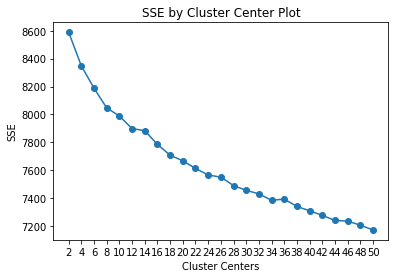

In [153]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tfidf_vector, 50)